In [1]:
#Importing the requirements packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing warning function to ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading PISA 2012 data 
wiki = pd.read_html('https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment_(2000_to_2012)#PISA_2012')

In [4]:
#Reading the PISA math data
wiki_maths = wiki[3]

In [5]:
#Displaying the top 10 in maths
wiki_maths.head(10)

0                 1    2
0   1   Shanghai, China  613
1   2         Singapore  573
2   3  Hong Kong, China  561
3   4            Taiwan  560
4   5       South Korea  554
5   6      Macau, China  538
6   7             Japan  536
7   8     Liechtenstein  535
8   9       Switzerland  531
9  10       Netherlands  523

In [6]:
#Reading the PISA Science data
wiki_science = wiki[4]

In [7]:
#Displaying the top 10 in Science
wiki_science.head(10)

0                 1    2
0    1   Shanghai, China  580
1    2  Hong Kong, China  555
2    3         Singapore  551
3    4             Japan  547
4    5           Finland  545
5    6           Estonia  541
6    7       South Korea  538
7    8           Vietnam  528
8    9            Poland  526
9  10=     Liechtenstein  525

In [8]:
#Reading the PISA Reading data
wiki_reading = wiki[5]

In [9]:
#Displaying top 10 in Redaing data
wiki_reading.head(10)

0                 1    2
0   1   Shanghai, China  570
1   2  Hong Kong, China  545
2   3         Singapore  542
3   4             Japan  538
4   5       South Korea  536
5   6           Finland  524
6  7=            Taiwan  523
7  7=            Canada  523
8  7=           Ireland  523
9  10            Poland  518

In [10]:
#renamining the columns
wiki_maths.rename(index=str,columns={0:'Rank',1:'Country',2:'Score'},inplace=True)

In [11]:
#renamining the columns
wiki_science.rename(index=str,columns={0:'Rank',1:'Country',2:'Score'},inplace=True)

In [12]:
#renamining the columns
wiki_reading.rename(index=str,columns={0:'Rank',1:'Country',2:'Score'},inplace=True)

In [13]:
#displaying the top 10 in science 
wiki_maths.head(10)

Rank           Country  Score
0    1   Shanghai, China    613
1    2         Singapore    573
2    3  Hong Kong, China    561
3    4            Taiwan    560
4    5       South Korea    554
5    6      Macau, China    538
6    7             Japan    536
7    8     Liechtenstein    535
8    9       Switzerland    531
9   10       Netherlands    523

In [14]:
#displaying th top 10 in Science
wiki_science.head(10)

Rank           Country  Score
0    1   Shanghai, China    580
1    2  Hong Kong, China    555
2    3         Singapore    551
3    4             Japan    547
4    5           Finland    545
5    6           Estonia    541
6    7       South Korea    538
7    8           Vietnam    528
8    9            Poland    526
9  10=     Liechtenstein    525

In [15]:
#Displaying the top 10 in Reading
wiki_reading.head(10)

Rank           Country  Score
0    1   Shanghai, China    570
1    2  Hong Kong, China    545
2    3         Singapore    542
3    4             Japan    538
4    5       South Korea    536
5    6           Finland    524
6   7=            Taiwan    523
7   7=            Canada    523
8   7=           Ireland    523
9   10            Poland    518

In [16]:
#Merging the Maths, Science and reading data
wiki_table = pd.merge(wiki_maths, wiki_science, on = 'Country', how = 'outer')

In [17]:
wiki_table = pd.merge(wiki_table, wiki_reading, on = 'Country', how = 'outer')

In [18]:
wiki_table.head()

Rank_x           Country  Score_x Rank_y  Score_y Rank  Score
0      1   Shanghai, China      613      1      580    1    570
1      2         Singapore      573      3      551    3    542
2      3  Hong Kong, China      561      2      555    2    545
3      4            Taiwan      560     13      523   7=    523
4      5       South Korea      554      7      538    5    536

In [19]:
#Removing the Columns 
del wiki_table["Rank"]
del wiki_table["Rank_x"]
del wiki_table["Rank_y"]

In [20]:
wiki_table.rename(index=str, columns={'Score_x':'Math', 'Score_y':'Science', 'Score':'Reading'}, inplace=True)

In [21]:
#Displaying the top 10 rows
wiki_table.head(10)

Country  Math  Science  Reading
0   Shanghai, China   613      580      570
1         Singapore   573      551      542
2  Hong Kong, China   561      555      545
3            Taiwan   560      523      523
4       South Korea   554      538      536
5      Macau, China   538      521      509
6             Japan   536      547      538
7     Liechtenstein   535      525      516
8       Switzerland   531      515      509
9       Netherlands   523      522      511

In [22]:
#Creating a new column 'SUM' which displays the sum of the scores
wiki_table['Sum'] = wiki_table['Math'] + wiki_table['Science'] + wiki_table['Reading']

In [23]:
#Displaying the top 10
wiki_table.head(10)

Country  Math  Science  Reading   Sum
0   Shanghai, China   613      580      570  1763
1         Singapore   573      551      542  1666
2  Hong Kong, China   561      555      545  1661
3            Taiwan   560      523      523  1606
4       South Korea   554      538      536  1628
5      Macau, China   538      521      509  1568
6             Japan   536      547      538  1621
7     Liechtenstein   535      525      516  1576
8       Switzerland   531      515      509  1555
9       Netherlands   523      522      511  1556

In [24]:
#Sorting the Data frame by Sum
wiki_table.sort_values(by='Sum',ascending=False, inplace=True)

In [25]:
#Displaying the top 10 in the Data frame
wiki_table.head(10)

Country  Math  Science  Reading   Sum
0    Shanghai, China   613      580      570  1763
1          Singapore   573      551      542  1666
2   Hong Kong, China   561      555      545  1661
4        South Korea   554      538      536  1628
6              Japan   536      547      538  1621
3             Taiwan   560      523      523  1606
11           Finland   519      545      524  1588
10           Estonia   521      541      516  1578
7      Liechtenstein   535      525      516  1576
5       Macau, China   538      521      509  1568

In [26]:
#Creaitng a new column 'Average' which stores the average of math and science and reading.
wiki_table['Average'] = (wiki_table['Math'] + wiki_table['Science'] + wiki_table['Reading'])//3

In [27]:
#Dispalying the top 10 rows in the data frame.
wiki_table.head(10)

Country  Math  Science  Reading   Sum  Average
0    Shanghai, China   613      580      570  1763      587
1          Singapore   573      551      542  1666      555
2   Hong Kong, China   561      555      545  1661      553
4        South Korea   554      538      536  1628      542
6              Japan   536      547      538  1621      540
3             Taiwan   560      523      523  1606      535
11           Finland   519      545      524  1588      529
10           Estonia   521      541      516  1578      526
7      Liechtenstein   535      525      516  1576      525
5       Macau, China   538      521      509  1568      522

In [28]:
#Using the describe function to get all the stats
wiki_table.describe()

Math     Science     Reading          Sum     Average
count   65.000000   65.000000   65.000000    65.000000   65.000000
mean   473.338462  478.569231  473.984615  1425.892308  474.953846
std     55.494165   50.684678   47.095811   151.732405   50.540340
min    368.000000  373.000000  384.000000  1125.000000  375.000000
25%    432.000000  439.000000  441.000000  1312.000000  437.000000
50%    484.000000  494.000000  488.000000  1464.000000  488.000000
75%    511.000000  521.000000  509.000000  1546.000000  515.000000
max    613.000000  580.000000  570.000000  1763.000000  587.000000

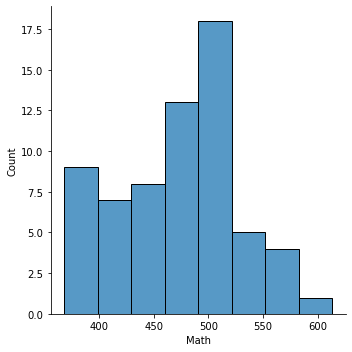

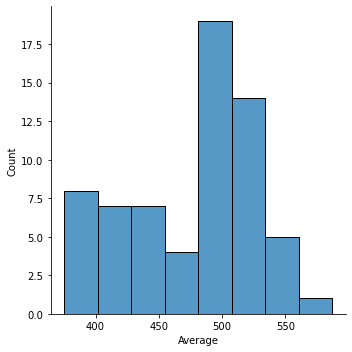

In [29]:
#Plotting the distribution plot on the Math and average score.
sns.displot(wiki_table['Math'])
sns.displot(wiki_table['Average'])
plt.show()

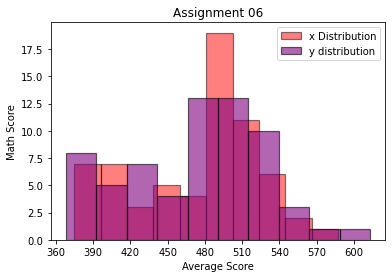

In [30]:
#Plotting the histogram as per the stands.
plt.title("Assignment 06")
plt.xlabel('Average Score')
plt.ylabel('Math Score')
plt.xticks(np.arange(360,630,step=30))
# plt.yticks(np.arange(0.000,0.0014,step=0.002))
plt.hist(wiki_table['Average'], color='Red',alpha = 0.5, edgecolor='black', linewidth=1.2 )
plt.hist(wiki_table['Math'], alpha=0.6,color = 'purple', edgecolor='black', linewidth=1.2 )
plt.legend(['x Distribution','y distribution'])
plt.show()

In [39]:
#Creating Find Outlier function to display outlier !!
def find_outlier(col):
    if col in wiki_table.columns:
        print(f'The outliers in {col} are {(wiki_table[abs((wiki_table[col]-wiki_table[col].mean())/wiki_table[col].std())>1.8].Country.values).tolist()}.')
    else:
        print('Error Invalid String !!')

In [40]:
find_outlier('Math')
find_outlier('Science')
find_outlier('Reading')
find_outlier('Average')
find_outlier('temp')


The outliers in Math are ['Shanghai, China', 'Peru'].
The outliers in Science are ['Shanghai, China', 'Indonesia', 'Qatar', 'Peru'].
The outliers in Reading are ['Shanghai, China', 'Qatar', 'Peru'].
The outliers in Average are ['Shanghai, China', 'Qatar', 'Peru'].
Error Invalid String !!
